# **IMPORTS**

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [20]:
!pip install chardet
import chardet
with open("/content/GMM_Dataset_1.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv("/content/GMM_Dataset_1.csv", encoding=encoding)
df.head()

,Food Item,Diet,Calories (per serving),Carbohydrates (g),Fat (g),Protein (g),Fiber (g)
0,Beef Bourguignon,Non-Veg,400.0,20.0,25.0,30.0,4.0
1,Coq au Vin,Non-Veg,380.0,15.0,22.0,28.0,3.0
2,Beef Wellington,Non-Veg,450.0,30.0,28.0,35.0,3.0
3,Chicken Cordon Bleu,Non-Veg,350.0,25.0,18.0,30.0,2.0
4,Spaghetti Bolognese,Non-Veg,380.0,40.0,15.0,20.0,3.0


In [21]:
df.shape

(300, 7)

In [22]:
df.describe()

,Calories (per serving),Carbohydrates (g),Fat (g),Protein (g),Fiber (g)
count,292.000000,293.000000,296.000000,282.000000,290.000000
mean,318.082192,25.880546,18.266892,18.968085,2.679310
std,59.045269,8.371678,6.048369,8.717943,0.882698
min,120.000000,5.000000,5.000000,3.000000,1.000000
25%,280.000000,20.000000,15.000000,10.000000,2.000000
50%,320.000000,25.000000,18.000000,17.000000,3.000000
75%,360.000000,30.000000,22.000000,28.000000,3.000000
max,450.000000,45.000000,35.000000,35.000000,6.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Food Item               300 non-null    object 
 1   Diet                    300 non-null    object 
 2   Calories (per serving)  292 non-null    float64
 3   Carbohydrates (g)       293 non-null    float64
 4   Fat (g)                 296 non-null    float64
 5   Protein (g)             282 non-null    float64
 6   Fiber (g)               290 non-null    float64
dtypes: float64(5), object(2)
memory usage: 16.5+ KB


In [24]:
df.dtypes

Food Item                  object
Diet                       object
Calories (per serving)    float64
Carbohydrates (g)         float64
Fat (g)                   float64
Protein (g)               float64
Fiber (g)                 float64
dtype: object

# **PREPROCESSING**

**MISSING VALUES**

In [25]:
df.nunique()

Food Item                 289
Diet                        2
Calories (per serving)     27
Carbohydrates (g)          11
Fat (g)                    13
Protein (g)                16
Fiber (g)                   6
dtype: int64

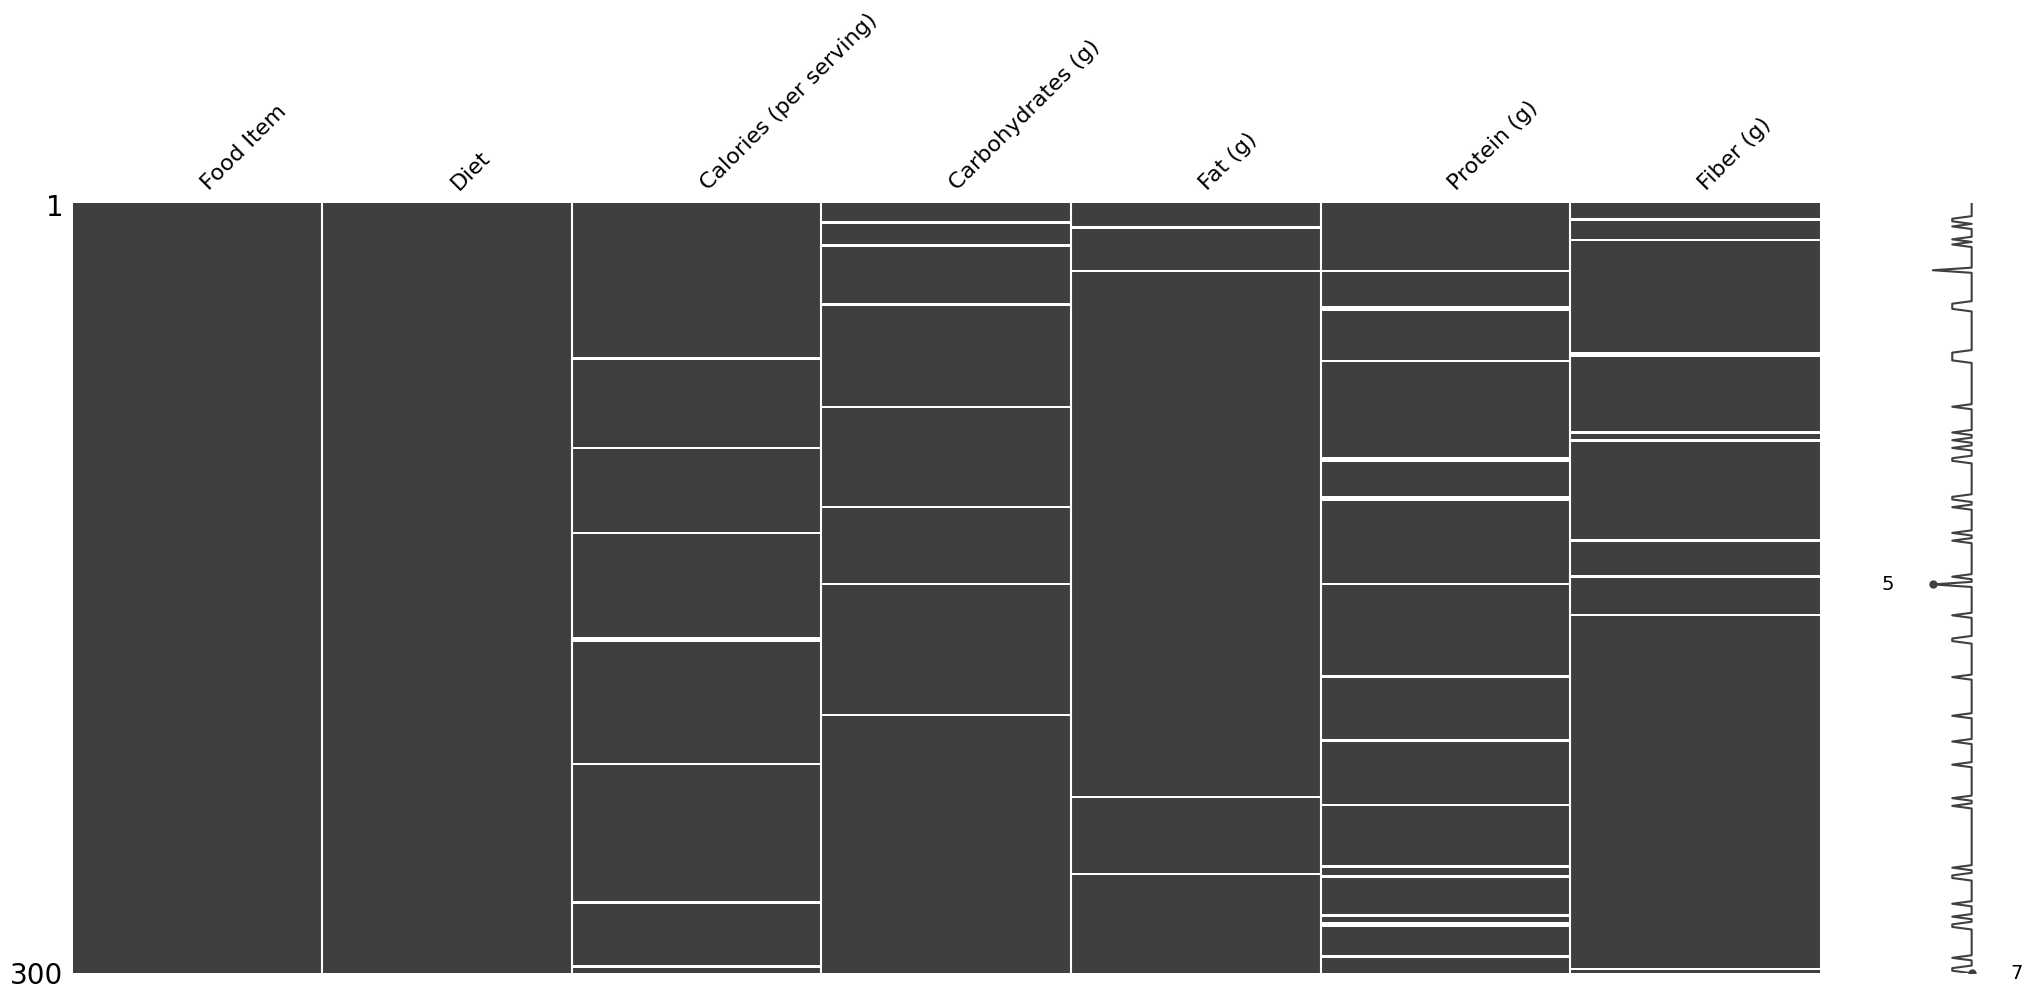

In [26]:
msno.matrix(df)
plt.show()

In [27]:
df.isnull().sum()

Food Item                  0
Diet                       0
Calories (per serving)     8
Carbohydrates (g)          7
Fat (g)                    4
Protein (g)               18
Fiber (g)                 10
dtype: int64

In [28]:
df["Calories (per serving)"].fillna(value = df["Calories (per serving)"].mean(), inplace = True)
df["Carbohydrates (g)"].fillna(value = df["Carbohydrates (g)"].mean(), inplace = True)
df["Fat (g)"].fillna(value = df["Fat (g)"].mean(), inplace = True)
df["Protein (g)"].fillna(value = df["Protein (g)"].mean(), inplace = True)
df["Fiber (g)"].fillna(value = df["Fiber (g)"].mean(), inplace = True)

df.isnull().sum()

Food Item                 0
Diet                      0
Calories (per serving)    0
Carbohydrates (g)         0
Fat (g)                   0
Protein (g)               0
Fiber (g)                 0
dtype: int64

In [29]:
df.nunique()

Food Item                 289
Diet                        2
Calories (per serving)     28
Carbohydrates (g)          12
Fat (g)                    14
Protein (g)                17
Fiber (g)                   7
dtype: int64

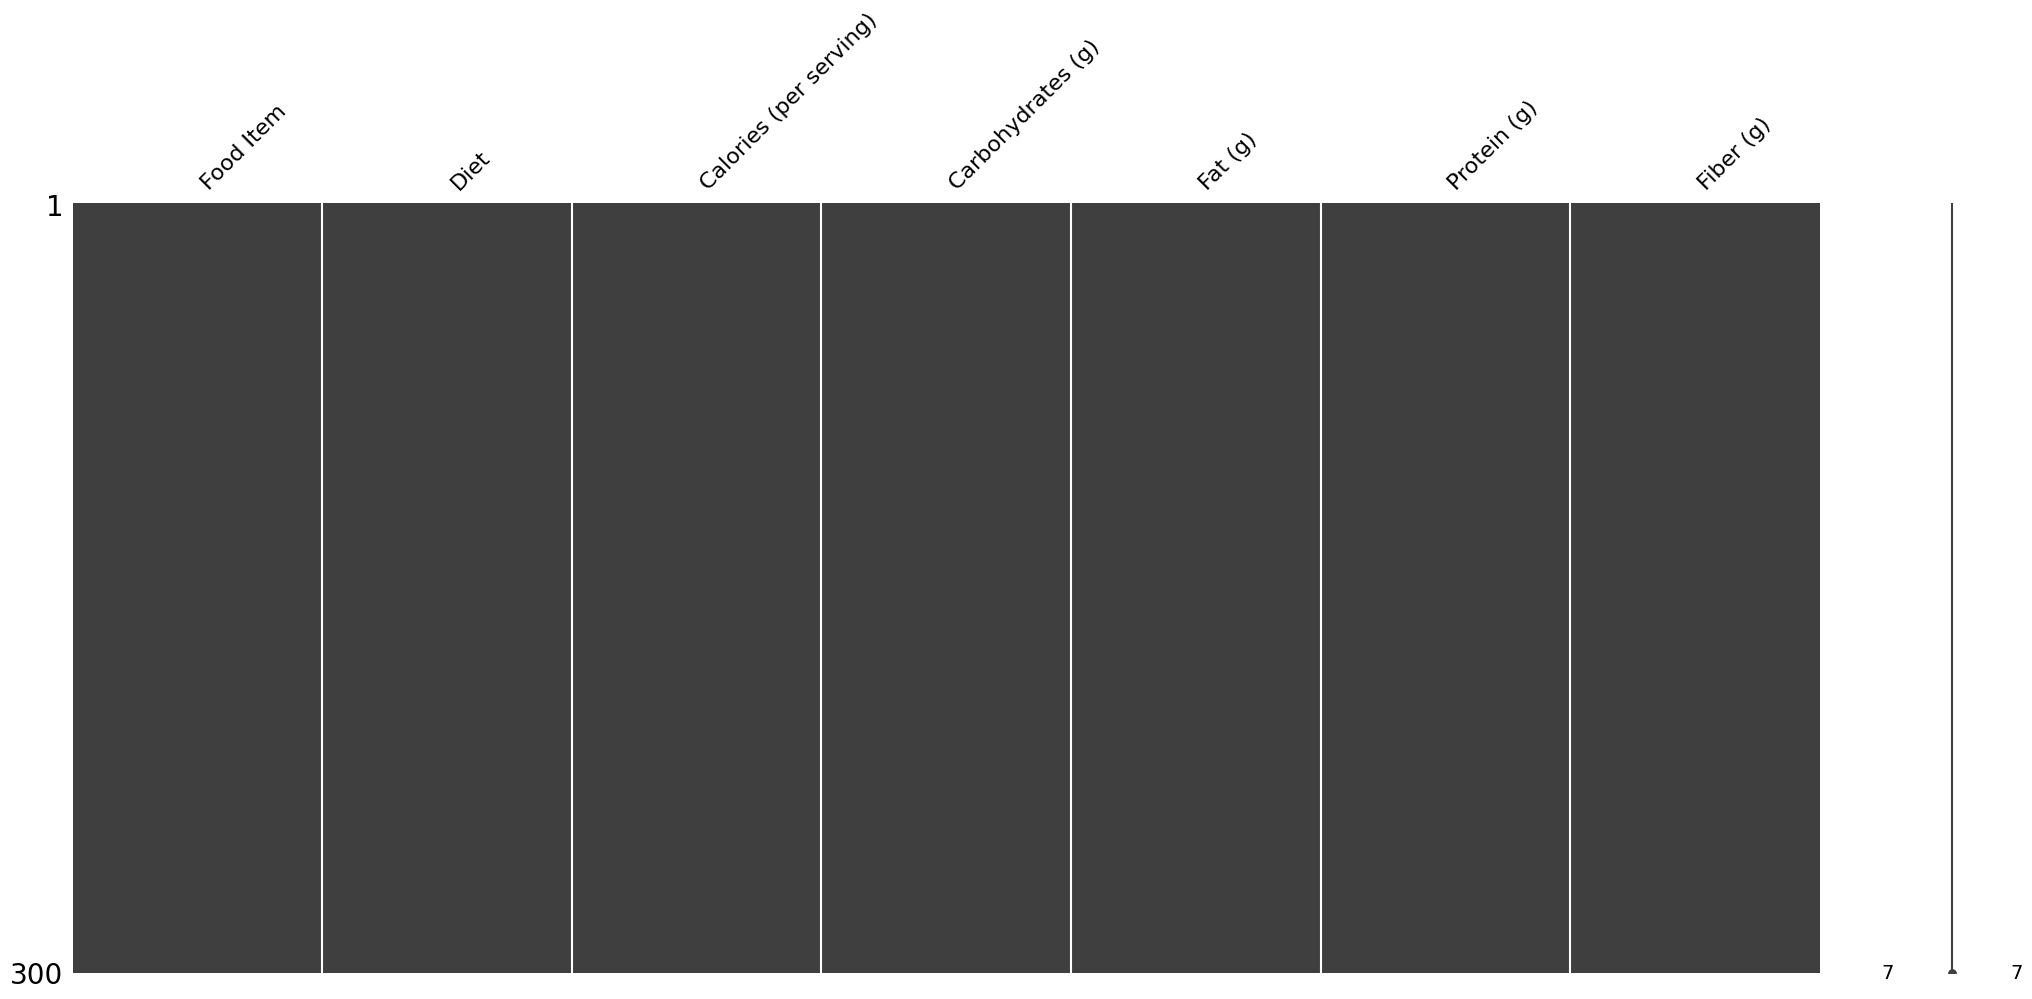

In [30]:
msno.matrix(df)
plt.show()

**NORMALIZATION**

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numerical columns for scaling
numerical_columns = ["Calories (per serving)", "Carbohydrates (g)", "Fat (g)", "Protein (g)", "Fiber (g)"]
numerical_data = df[numerical_columns]

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Creating a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Concatenating the scaled data with the non-numerical columns
final_df = pd.concat([df["Food Item"], df["Diet"], scaled_df], axis=1)

print(final_df)

                Food Item     Diet  Calories (per serving)  Carbohydrates (g)  \
0        Beef Bourguignon  Non-Veg                0.848485              0.375   
1              Coq au Vin  Non-Veg                0.787879              0.250   
2         Beef Wellington  Non-Veg                1.000000              0.625   
3     Chicken Cordon Bleu  Non-Veg                0.696970              0.500   
4     Spaghetti Bolognese  Non-Veg                0.787879              0.875   
..                    ...      ...                     ...                ...   
295       Veggie Frittata      Veg                0.515152              0.250   
296          Paneer Bhaji      Veg                0.606061              0.375   
297            Corn Pulao      Veg                0.600249              0.875   
298       Veggie Pancakes      Veg                0.454545              0.625   
299            Veggie Pie      Veg                0.666667              0.750   

      Fat (g)  Protein (g) 

# **CORRELATION BETWEEN FEATURES**

In [35]:
corr = df.corr()
corr

<ipython-input-35-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Calories (per serving),Carbohydrates (g),Fat (g),Protein (g),Fiber (g)
Calories (per serving),1.000000,0.052106,0.848405,0.762797,-0.214051
Carbohydrates (g),0.052106,1.000000,-0.304791,-0.300908,0.290453
Fat (g),0.848405,-0.304791,1.000000,0.758455,-0.277178
Protein (g),0.762797,-0.300908,0.758455,1.000000,-0.439290
Fiber (g),-0.214051,0.290453,-0.277178,-0.439290,1.000000


<Axes: >

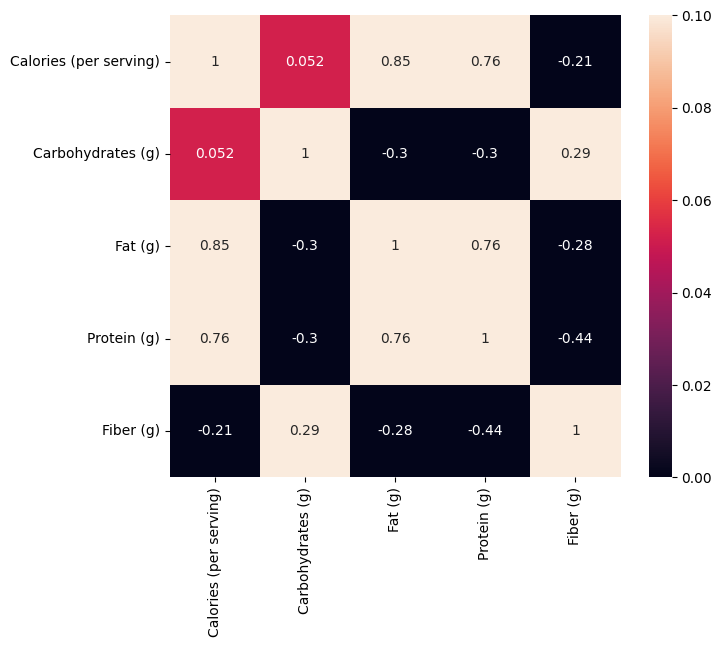

In [36]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr, annot=True, vmin=0, vmax=0.1)

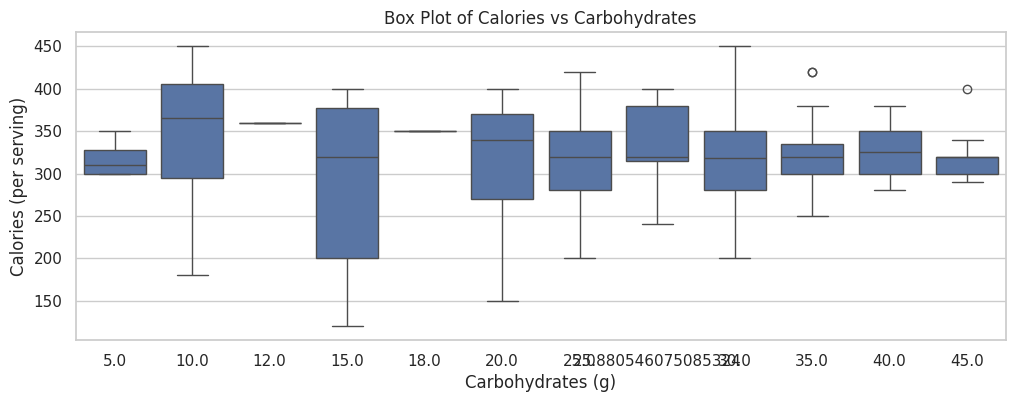

In [58]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Carbohydrates (g)', y='Calories (per serving)', data=df)
plt.title('Box Plot of Calories vs Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Calories (per serving)')
plt.show()

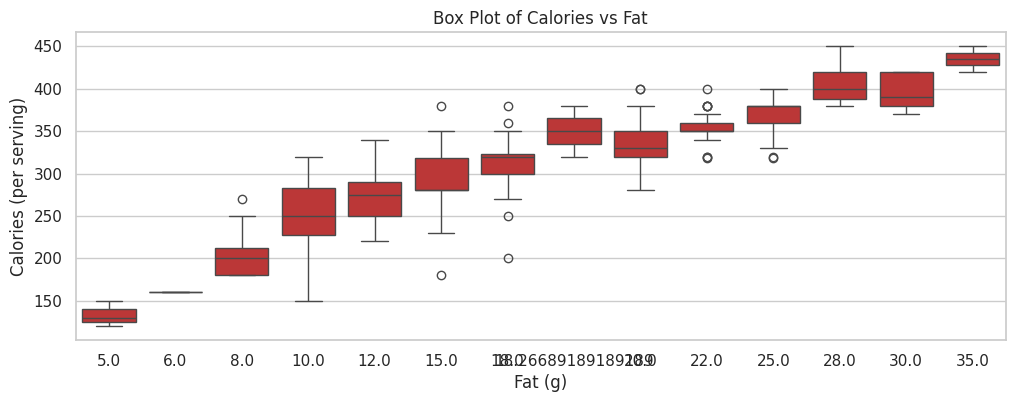

In [84]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Fat (g)', y='Calories (per serving)', data=df, color='#d12121')
plt.title('Box Plot of Calories vs Fat')
plt.xlabel('Fat (g)')
plt.ylabel('Calories (per serving)')
plt.show()

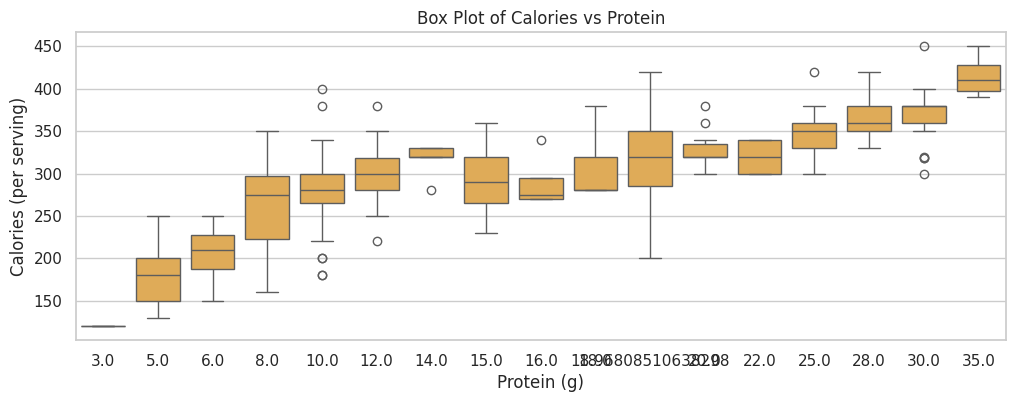

In [82]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Protein (g)', y='Calories (per serving)', data=df, color='#f5b042')
plt.title('Box Plot of Calories vs Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Calories (per serving)')
plt.show()

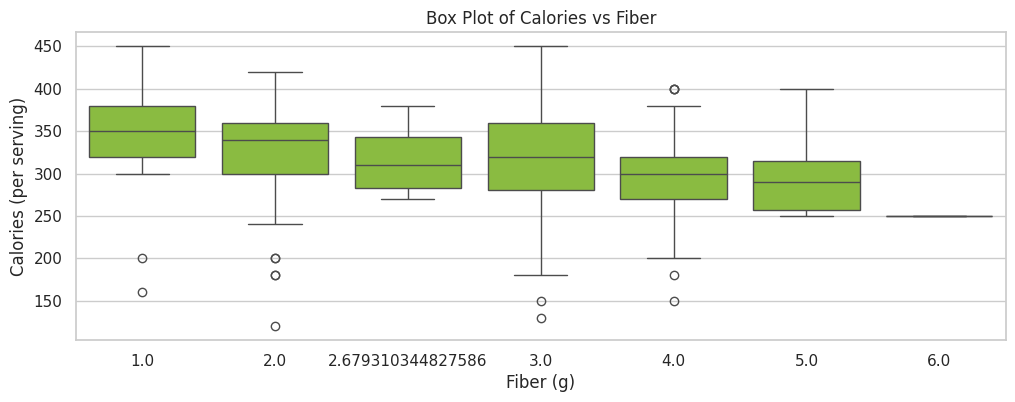

In [83]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Fiber (g)', y='Calories (per serving)', data=df, color='#8ecf2d')
plt.title('Box Plot of Calories vs Fiber')
plt.xlabel('Fiber (g)')
plt.ylabel('Calories (per serving)')
plt.show()

# **MODEL INITIALIZATION**

**GAUSSIAN COMPONENTS:** Components that best represent the underlying structure of the data.

SILHOUTTE SCORE: Calculated using a heuristic technique used to determine the optimal number of clusters in a dataset. It helps to identify the point at which adding another cluster does not significantly improve the model's performance.

In [89]:
# Initialize a range of components to try
components_range = range(2, 11)  # Trying 2 to 10 components

best_score = -1
best_n_components = None

# Iterate over different number of components
for n_components in components_range:
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)

    # Predict clusters
    labels = gmm.predict(scaled_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, labels)

    # Print silhouette score for each number of components
    print(f"For {n_components} components, silhouette score: {silhouette_avg}")

    # Update the best score and number of components if needed
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_components = n_components

print(f"Best number of components: {best_n_components} with silhouette score: {best_score}")

For 2 components, silhouette score: 0.421191343006957
For 3 components, silhouette score: 0.3124888044897124
For 4 components, silhouette score: 0.2650149965670668
For 5 components, silhouette score: 0.1687500172857563
For 6 components, silhouette score: 0.18636679203955245
For 7 components, silhouette score: 0.17638964769288956
For 8 components, silhouette score: 0.16962412683053577
For 9 components, silhouette score: 0.1659488829292113
For 10 components, silhouette score: -0.011014842270739037
Best number of components: 2 with silhouette score: 0.421191343006957


**INITIALIZE PARAMETERS:** Randomly initialize the parameters for each Gaussian component, including means, covariances, and mixing coefficients

In [90]:
# Initialize Gaussian Mixture Model with the best number of components
gmm = GaussianMixture(n_components=best_n_components, random_state=42)

# Fit the model to the scaled data
gmm.fit(scaled_data)

# Get the initialized parameters
means = gmm.means_
covariances = gmm.covariances_
mixing_coefficients = gmm.weights_

# Print the initialized parameters
print("Initialized Parameters:")
for i in range(best_n_components):
    print(f"Component {i + 1}:")
    print(f"Mean: {means[i]}")
    print(f"Covariance: {covariances[i]}")
    print(f"Mixing Coefficient: {mixing_coefficients[i]}")
    print()

Initialized Parameters:
Component 1:
Mean: [0.50462205 0.58671704 0.32544025 0.30359227 0.4040043 ]
Covariance: [[ 0.02412629  0.01684654  0.01684361  0.0106247   0.00194259]
 [ 0.01684654  0.04345833 -0.0016866   0.00365667  0.00328653]
 [ 0.01684361 -0.0016866   0.02260538  0.0082927   0.00261673]
 [ 0.0106247   0.00365667  0.0082927   0.0178096  -0.0037119 ]
 [ 0.00194259  0.00328653  0.00261673 -0.0037119   0.02681885]]
Mixing Coefficient: 0.5932152299954287

Component 2:
Mean: [0.73970217 0.42765655 0.61254412 0.78397011 0.23649008]
Covariance: [[ 0.0083759   0.00227497  0.00887836  0.00464388  0.0044603 ]
 [ 0.00227497  0.0264284  -0.00138073 -0.00027798  0.00494717]
 [ 0.00887836 -0.00138073  0.01639755  0.00437695  0.00110978]
 [ 0.00464388 -0.00027798  0.00437695  0.00804118  0.00381205]
 [ 0.0044603   0.00494717  0.00110978  0.00381205  0.01805295]]
Mixing Coefficient: 0.4067847700045712



<ipython-input-91-1b4337472ef2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[:, 0], shade=True, label=f'Cluster {i+1}')
<ipython-input-91-1b4337472ef2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[:, 0], shade=True, label=f'Cluster {i+1}')


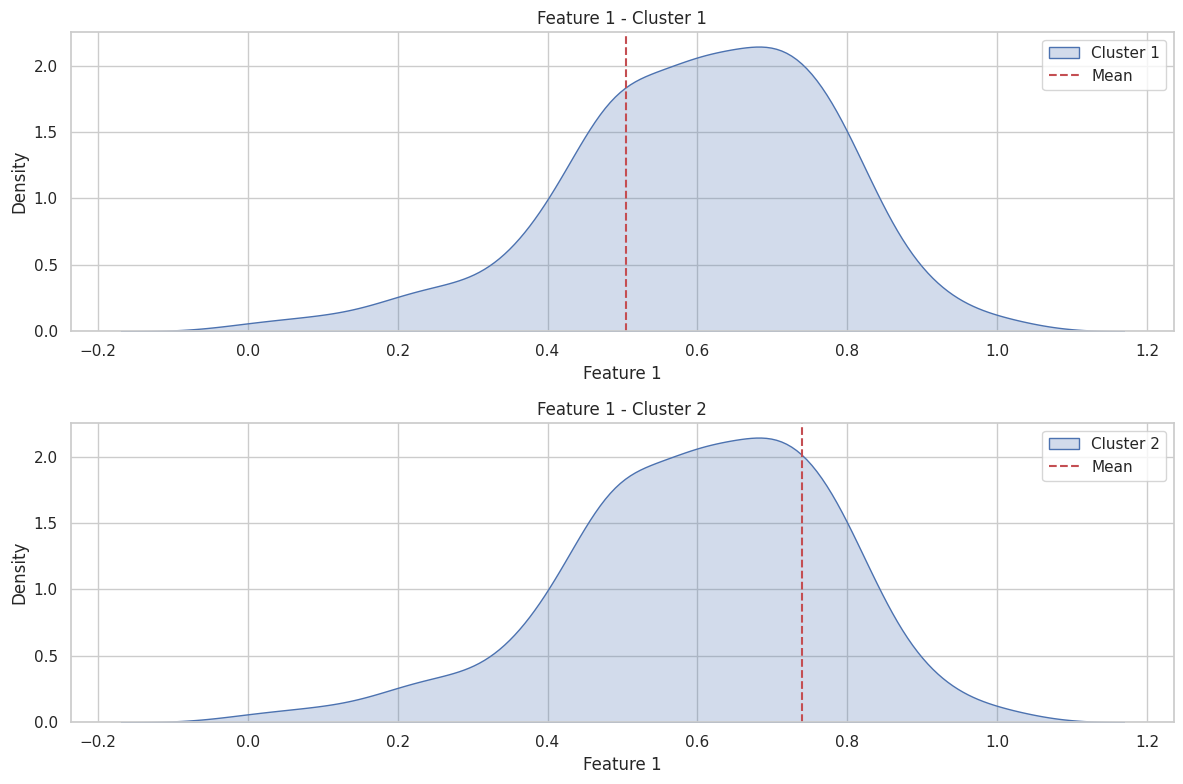

In [91]:
# Plotting the density plots for each feature in each cluster
plt.figure(figsize=(12, 8))
for i in range(best_n_components):
    plt.subplot(best_n_components, 1, i+1)
    sns.kdeplot(scaled_data[:, 0], shade=True, label=f'Cluster {i+1}')
    plt.axvline(x=means[i, 0], color='r', linestyle='--', label='Mean')
    plt.title(f'Feature 1 - Cluster {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# **EXPECTATION-MAXIMIZATION ALGORITHM**

**EXPECTATION (E-step):** Compute the posterior probabilities (responsibilities) of each data point belonging to each Gaussian component using the current parameter estimates.

In [92]:
# Compute the posterior probabilities (responsibilities) using the current parameter estimates
responsibilities = gmm.predict_proba(scaled_data)

# Print the posterior probabilities for the first few data points
print("Posterior Probabilities (Responsibilities) for the first few data points:")
print(responsibilities[:5])  # printing for the first 5 data points

Posterior Probabilities (Responsibilities) for the first few data points:
[[7.71153374e-05 9.99922885e-01]
 [2.12526932e-05 9.99978747e-01]
 [5.71938781e-05 9.99942806e-01]
 [2.48941148e-04 9.99751059e-01]
 [9.99991924e-01 8.07555898e-06]]


**MAXIMIZATION (M-step):** Update the parameters (means, covariances, and mixing coefficients) based on the current posterior probabilities.

In [93]:
# Fit the Gaussian Mixture Model to the data with the current responsibilities
gmm.fit(scaled_data, responsibilities)

# Get the updated parameters
updated_means = gmm.means_
updated_covariances = gmm.covariances_
updated_mixing_coefficients = gmm.weights_

# Print the updated parameters
print("Updated Parameters:")
for i in range(best_n_components):
    print(f"Component {i + 1}:")
    print(f"Mean: {updated_means[i]}")
    print(f"Covariance: {updated_covariances[i]}")
    print(f"Mixing Coefficient: {updated_mixing_coefficients[i]}")
    print()

Updated Parameters:
Component 1:
Mean: [0.50462205 0.58671704 0.32544025 0.30359227 0.4040043 ]
Covariance: [[ 0.02412629  0.01684654  0.01684361  0.0106247   0.00194259]
 [ 0.01684654  0.04345833 -0.0016866   0.00365667  0.00328653]
 [ 0.01684361 -0.0016866   0.02260538  0.0082927   0.00261673]
 [ 0.0106247   0.00365667  0.0082927   0.0178096  -0.0037119 ]
 [ 0.00194259  0.00328653  0.00261673 -0.0037119   0.02681885]]
Mixing Coefficient: 0.5932152299954287

Component 2:
Mean: [0.73970217 0.42765655 0.61254412 0.78397011 0.23649008]
Covariance: [[ 0.0083759   0.00227497  0.00887836  0.00464388  0.0044603 ]
 [ 0.00227497  0.0264284  -0.00138073 -0.00027798  0.00494717]
 [ 0.00887836 -0.00138073  0.01639755  0.00437695  0.00110978]
 [ 0.00464388 -0.00027798  0.00437695  0.00804118  0.00381205]
 [ 0.0044603   0.00494717  0.00110978  0.00381205  0.01805295]]
Mixing Coefficient: 0.4067847700045712



**CONVERGANCE:** Repeat the E-step and M-step iteratively until convergence. Convergence can be determined by observing the change in log-likelihood or other convergence criteria.

In [94]:
# Set convergence criteria
max_iterations = 100  # Maximum number of iterations
tolerance = 1e-6  # Tolerance for change in log-likelihood

# Initialize variables
prev_log_likelihood = -np.inf

# Perform EM iterations
for iteration in range(max_iterations):
    # E-step: Compute the posterior probabilities
    responsibilities = gmm.predict_proba(scaled_data)

    # M-step: Update the parameters based on the current responsibilities
    gmm.fit(scaled_data, responsibilities)

    # Compute log-likelihood
    log_likelihood = gmm.score(scaled_data)

    # Check for convergence
    if abs(log_likelihood - prev_log_likelihood) < tolerance:
        print(f"Convergence achieved after {iteration + 1} iterations.")
        break

    # Update previous log-likelihood
    prev_log_likelihood = log_likelihood

    # Print progress
    print(f"Iteration {iteration + 1}: Log-Likelihood = {log_likelihood}")

# Get the final parameters after convergence
final_means = gmm.means_
final_covariances = gmm.covariances_
final_mixing_coefficients = gmm.weights_

# Print the final parameters
print("\nFinal Parameters after Convergence:")
for i in range(best_n_components):
    print(f"Component {i + 1}:")
    print(f"Mean: {final_means[i]}")
    print(f"Covariance: {final_covariances[i]}")
    print(f"Mixing Coefficient: {final_mixing_coefficients[i]}")
    print()

Iteration 1: Log-Likelihood = 3.0303033198333584
Convergence achieved after 2 iterations.

Final Parameters after Convergence:
Component 1:
Mean: [0.50462205 0.58671704 0.32544025 0.30359227 0.4040043 ]
Covariance: [[ 0.02412629  0.01684654  0.01684361  0.0106247   0.00194259]
 [ 0.01684654  0.04345833 -0.0016866   0.00365667  0.00328653]
 [ 0.01684361 -0.0016866   0.02260538  0.0082927   0.00261673]
 [ 0.0106247   0.00365667  0.0082927   0.0178096  -0.0037119 ]
 [ 0.00194259  0.00328653  0.00261673 -0.0037119   0.02681885]]
Mixing Coefficient: 0.5932152299954287

Component 2:
Mean: [0.73970217 0.42765655 0.61254412 0.78397011 0.23649008]
Covariance: [[ 0.0083759   0.00227497  0.00887836  0.00464388  0.0044603 ]
 [ 0.00227497  0.0264284  -0.00138073 -0.00027798  0.00494717]
 [ 0.00887836 -0.00138073  0.01639755  0.00437695  0.00110978]
 [ 0.00464388 -0.00027798  0.00437695  0.00804118  0.00381205]
 [ 0.0044603   0.00494717  0.00110978  0.00381205  0.01805295]]
Mixing Coefficient: 0.406

# **Cluster Assignment**

After convergence, assign each data point to the Gaussian component with the highest posterior probability. This step determines the final cluster assignments for each data point.

In [95]:
# Assign each data point to the Gaussian component with the highest posterior probability
cluster_assignments = gmm.predict(scaled_data)

# Print the cluster assignments for the data points
print("Cluster Assignments for the data points:")
print(cluster_assignments[:30])  # printing for the first 30 data points

Cluster Assignments for the data points:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]


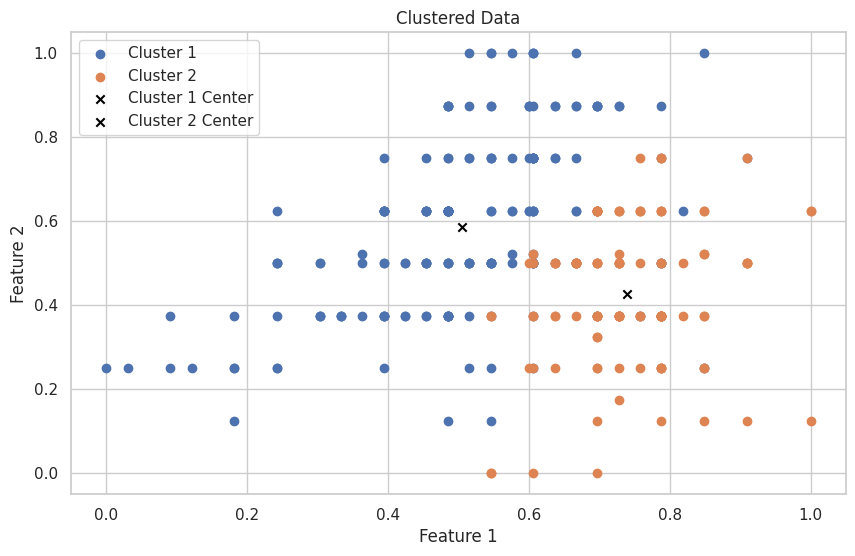

In [96]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(best_n_components):
    cluster_data = scaled_data[cluster_assignments == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')

# Plot cluster centers
for i in range(best_n_components):
    plt.scatter(final_means[i, 0], final_means[i, 1], color='black', marker='x', label=f'Cluster {i + 1} Center')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
plt.legend()
plt.grid(True)
plt.show()

# **EVALUATION**

In [97]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_assignments)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.421191343006957
